In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cleaning Data

In [2]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: D258-06D3

 Directorio de C:\Users\Sergio\Documents\IA\Projects\car_prediction

06/07/2022  20:24    <DIR>          .
06/07/2022  20:24    <DIR>          ..
06/07/2022  20:13    <DIR>          .ipynb_checkpoints
06/07/2022  20:21            12.342 Build_model_car_prediction.ipynb
06/07/2022  13:18                62 car_prediction.py
06/07/2022  11:38         2.201.879 car_price_prediction.csv
06/07/2022  20:24           118.267 clean_prediction_car.ipynb
               4 archivos      2.332.550 bytes
               3 dirs  53.976.154.112 bytes libres


In [3]:
data=pd.read_csv("car_price_prediction.csv")


In [4]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [5]:
data[['Price']]

,Price
0,13328
1,16621
2,8467
3,3607
4,11726
...,...
19232,8467
19233,15681
19234,26108
19235,5331


In [6]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
data.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [8]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
len(data)

19237

In [10]:
data=data.dropna(how='any')

In [11]:
len(data)

19237

In [12]:
#Cuantos guines hay
data.isin(['-']).sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [13]:
#Indices de los guiones
val=data[data['Levy']=='-'].index
val


Int64Index([    2,     9,    11,    12,    23,    24,    25,    27,    32,
               34,
            ...
            19205, 19218, 19219, 19220, 19221, 19223, 19224, 19226, 19229,
            19232],
           dtype='int64', length=5819)

In [14]:
#elimiando datos con los indices de antes
data_aux=data
data_aux=data_aux.drop(val)

In [15]:
data_aux

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [16]:
data_aux['Levy']=data_aux['Levy'].astype('int64')

In [17]:
mean_levy=int(data_aux['Levy'].mean())
mean_levy

906

In [18]:
data['Levy']=data['Levy'].replace("-",mean_levy)

In [19]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [20]:
data.isin(["-"]).sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [21]:
#Eliminar datos numericos con letras ejmplo: '2.0 Turbo'

# data_aux['Engine volume']=data['Engine volume'].str.extract('([a-zA-Z]+)')
# indice=data_aux[data_aux['Engine volume']=='Turbo'].index
# indice

In [22]:
data['Levy']=data['Levy'].astype('int64')
data=data.drop(['ID','Engine volume','Doors','Wheel'],axis=1)

In [23]:
data.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Color                object
Airbags               int64
dtype: object

In [24]:
data.to_csv("clean_car_prediction.csv",index=None)

## Exploring information

In [25]:
data.describe()

,Price,Levy,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,906.584603,2010.912824,4.582991,6.582627
std,1.905813e+05,385.733647,5.668673,1.199933,4.320168
min,1.000000e+00,87.000000,1939.000000,1.000000,0.000000
25%,5.331000e+03,730.000000,2009.000000,4.000000,4.000000
50%,1.317200e+04,906.000000,2012.000000,4.000000,6.000000
75%,2.207500e+04,917.000000,2015.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,16.000000,16.000000


In [26]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005 km,6.0,Automatic,4x4,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000 km,6.0,Tiptronic,4x4,Black,8
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,200000 km,4.0,Variator,Front,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966 km,4.0,Automatic,4x4,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901 km,4.0,Automatic,Front,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000 km,4.0,Manual,Rear,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600 km,4.0,Tiptronic,Front,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365 km,4.0,Automatic,Front,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258 km,4.0,Automatic,Front,Black,4


### Analisis Unidimensional

In [27]:
#Variables categoricas
data['Manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
SATURN              1
PONTIAC             1
GREATWALL           1
HAVAL               1
Name: Manufacturer, Length: 65, dtype: int64

In [28]:
data['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [29]:
len(data['Category'].unique())

11

[ 6.  4.  8.  1. 12.  3.  2. 16.  5.  7.  9. 10. 14.]


<AxesSubplot:>

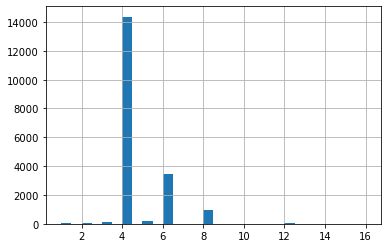

In [30]:
#Valores numericos
print((data['Cylinders'].unique()))
data['Cylinders'].hist(bins=30)

<AxesSubplot:>

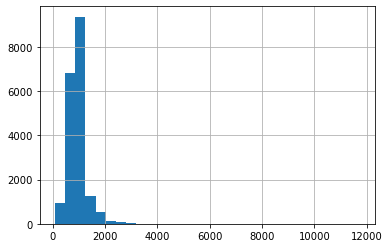

In [31]:
data['Levy'].hist(bins=30)

### Analisis multidimensional

In [32]:
data['Price']

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 19237, dtype: int64

In [33]:
#Ordenar las marcas por precio
manufacturer_vs_Price=data.groupby('Manufacturer')['Price'].mean() #Tambien hay sum y count
manufacturer_vs_Price

Manufacturer
ACURA             5910.933333
ALFA ROMEO        9890.250000
ASTON MARTIN     54000.000000
AUDI             14106.545098
BENTLEY         197574.500000
                    ...      
VAZ               4613.583333
VOLKSWAGEN       11640.421416
VOLVO            10278.894737
ZAZ               3822.500000
სხვა             17248.500000
Name: Price, Length: 65, dtype: float64

In [34]:
sort_manufacturer_vs_Price=manufacturer_vs_Price.reset_index().sort_values(by='Price',ascending=False).iloc[0:10]
sort_manufacturer_vs_Price

,Manufacturer,Price
29,LAMBORGHINI,872946.000000
4,BENTLEY,197574.500000
42,OPEL,73305.617128
14,FERRARI,66955.500000
31,LAND ROVER,54053.489796
2,ASTON MARTIN,54000.000000
57,TESLA,53941.000000
45,PORSCHE,47106.037037
26,JAGUAR,34408.785714
22,HUMMER,31210.600000


<AxesSubplot:xlabel='Manufacturer'>

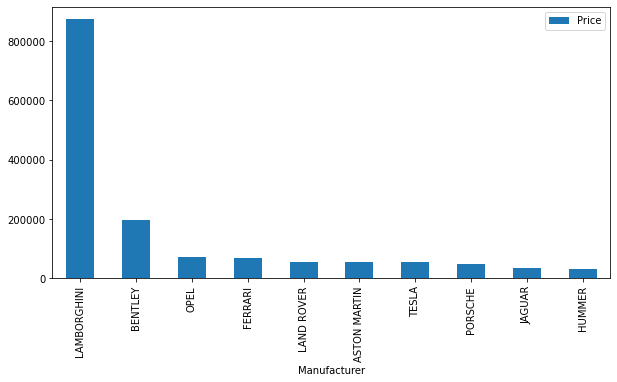

In [35]:
sort_manufacturer_vs_Price.plot(kind='bar', x='Manufacturer',y='Price',figsize=(10,5))

In [36]:
Manufacturer_category=data[data['Category']=='Jeep']
Manufacturer_category

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005 km,6.0,Automatic,4x4,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000 km,6.0,Tiptronic,4x4,Black,8
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966 km,4.0,Automatic,4x4,White,0
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,160931 km,4.0,Automatic,Front,White,4
9,26657,906,LEXUS,RX 350,2007,Jeep,Yes,Petrol,128500 km,6.0,Automatic,4x4,Silver,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19209,13808,1024,HYUNDAI,H1,2010,Jeep,Yes,Diesel,65691 km,4.0,Automatic,Front,Silver,4
19211,50037,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,121902 km,4.0,Automatic,Front,Black,4
19216,37633,1249,TOYOTA,RAV 4,2017,Jeep,Yes,Petrol,23430 km,4.0,Tiptronic,Front,Beige,12
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365 km,4.0,Automatic,Front,Grey,4


In [37]:
#Ordenar marcas por categoria JEEP con el precio
data.groupby(['Manufacturer','Category'])['Price'].count()


Manufacturer  Category 
ACURA         Jeep          6
              Sedan         9
ALFA ROMEO    Coupe         1
              Hatchback     1
              Sedan         2
                           ..
VOLVO         Sedan        10
ZAZ           Coupe         1
              Jeep          1
სხვა          Jeep          1
              Microbus      1
Name: Price, Length: 266, dtype: int64